In [1]:
# Cafe Sales Analysis using Python


In [2]:
import pandas as pd
import matplotlib.pyplot as plt


In [7]:
# 1. Load Data
df = pd.read_csv("C:\\Users\\ayaab\\Downloads\\Cafe-Sales-Analysis-Python\\Data\\before clean_cafe_sales.csv")
df.head()


,Transaction ID,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Location,Transaction Date
0,TXN_1961373,Coffee,2,2.0,4.0,Credit Card,Takeaway,2023-09-08
1,TXN_4977031,Cake,4,3.0,12.0,Cash,In-store,2023-05-16
2,TXN_4271903,Cookie,4,1.0,ERROR,Credit Card,In-store,2023-07-19
3,TXN_7034554,Salad,2,5.0,10.0,UNKNOWN,UNKNOWN,2023-04-27
4,TXN_3160411,Coffee,2,2.0,4.0,Digital Wallet,In-store,2023-06-11


In [8]:
# 2. Data Cleaning
df["Item"] = df["Item"].astype(str).str.strip()

df["Total Spent"] = (
    df["Total Spent"]
    .astype(str)
    .str.replace(r"[$,]", "", regex=True)
)

df["Total Spent"] = pd.to_numeric(df["Total Spent"], errors="coerce")
df["Quantity"] = pd.to_numeric(df["Quantity"], errors="coerce")

df_clean = df.dropna(subset=["Item", "Quantity", "Total Spent"])


In [9]:
# 3. Aggregation (Pivot Table)
pivot = (
    df_clean
    .groupby("Item")
    .agg(
        Total_Spent=("Total Spent", "sum"),
        Total_Quantity=("Quantity", "sum")
    )
    .reset_index()
    .sort_values(by="Total_Spent", ascending=False)
)

pivot.head()


,Item,Total_Spent,Total_Quantity
5,Salad,15810.0,3162.0
6,Sandwich,12220.0,3055.0
7,Smoothie,12096.0,3024.0
4,Juice,9588.0,3196.0
0,Cake,9516.0,3172.0


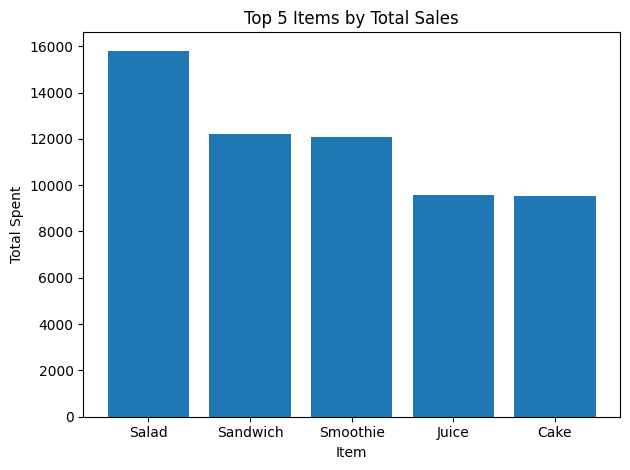

In [10]:
# 4. Visualization
top5 = pivot.head(5)

plt.figure()
plt.bar(top5["Item"], top5["Total_Spent"])
plt.title("Top 5 Items by Total Sales")
plt.xlabel("Item")
plt.ylabel("Total Spent")
plt.tight_layout()
plt.show()


In [11]:
top_item_name = top5.iloc[0]["Item"]

key_insights = f"""
## Key Insights

- A few products generate the majority of total sales.
- Top-selling item: **{top_item_name}**
- This analysis helps the café focus on high-performing items for promotions and inventory management.
"""

print(key_insights)



## Key Insights

- A few products generate the majority of total sales.
- Top-selling item: **Salad**
- This analysis helps the café focus on high-performing items for promotions and inventory management.

